## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# number of rows in dataframe
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
# number of unique users in dataframe
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
# proportion of users converted
# find number of unique users who converted
num_converts = df[df['converted']==True]['user_id'].nunique()
# divide number of converts over total number of visitors
num_converts/df['user_id'].nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# number of times the landing page is new, but the group is not treatment
df.query('(landing_page == "new_page") and (group != "treatment")')['user_id'].count()

1928

In [7]:
# number of times the group is treatment, but the landing page is not new
df.query('(group == "treatment") and (landing_page != "new_page")').count()

user_id         1965
timestamp       1965
group           1965
landing_page    1965
converted       1965
dtype: int64

The number of times new_page and treatment don't match is 1928 + 1965 = 3893.

f. Do any of the rows have missing values?

In [10]:
# for each column, count the number of missing rows
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

There are no missing values.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
# we need to drop all cases when the landing_page and group columns contradict each other
# index those cases  where landing page is new page but group is not treatment
i1 = df[((df.landing_page == 'new_page') & (df.group != 'treatment'))].index
# then drop those cases
df_int = df.drop(i1)
# then index those cases where landing page is old page but group is not control
i2 = df_int[((df_int.landing_page == 'old_page') & (df_int.group != 'control'))].index
# and drop those cases
df2 = df_int.drop(i2)

In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [13]:
# what about when group is control and LP isn't old page?
# we need zero of those too
df2[((df2['group'] == 'control') == (df2['landing_page'] == 'old_page')) == False].shape[0]

0

It is now always true that all treatment pages are new pages, and all control pages are old pages. So we've successfully removed all the inconistencies in that part of the dataset.

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
# count number of unique user_ids in current dataframe
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# count the number of duplicated user ids
df2['user_id'].duplicated().sum()

1

In [4]:
# find the duplicated user_id
duplicated = df2[df2.duplicated(['user_id'])]
duplicated

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [14]:
# examine rows that have the repeat user's id
df_repeats = df2[df2['user_id'] == 773192]
df_repeats

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
# drop the second row with the duplicated user_id
df2 = df2.drop([2893], axis=0)
# confirm that row no longer exists
# (should yield the error: [2893] not found in axis)
#df2.iloc(2893) [It works, but I'm sick of seeing the error]

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [10]:
# probablility of conversion of all users in entire dataframe
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [6]:
# probability of conversion of all users in control group
df2_control = df2[df2['group']=='control']
df2_control.converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [15]:
df2_treatment = df2[df2['group']=='treatment']
df2_treatment.converted.mean()

0.11880806551510564

In [24]:
# difference between conversion rates of treatment and control
observed_conv_rate_diff = (df2_treatment.converted.mean() - df2_control.converted.mean())
observed_conv_rate_diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [16]:
# number of people who got the new page
(df2[df2.landing_page =='new_page']).shape[0]

145310

In [26]:
# number of rows = number of users (now that we've cleaned up the data)
df2.shape[0]

290584

In [29]:
# the number of users who got the new page divided by the total number of users
# yields the probability that an individual received the new page
145310/df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

The conversion rate for the new page was less than for the old page. And an equal number of experiments were run (about 14500 for each), so they both had plenty of opportunities to prove themselves. In hypothesis tests, we always err on the side of keeping the original system in tact -- it is up to the new idea to prove itself. Since the new page didn't even do as well as the old page, we don't need to consider if the new page did enough better than the old page to justify overturning the old page. We can simply stick with the old page and be done with all this measuring of truth. {But how do we know 14500 trials with the new page and 14500 trials with the old page is enough trials to make a fair assessment? How do we know how many trials is required for that in a given case?}

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

The null hypothesis is that the new page performs the same or worse than the old page. The alternative hypothesis is that the new page performs better than the old page. We've decided we're comfortable with a Type 1 error rate of 5%.
P𝑜𝑙𝑑  and P𝑛𝑒𝑤 stand for the old and new conversion rates, respectively.
We can state our hypotheses like this:

H(0): Pnew - Pold =< 0

H(A): Pnew - Pold > 0

with an alpha of .05

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [6]:
#The conversion rate of Pnew and Pold are the same under the null.
#We've therefore assumed they both have the same conversion rate
#as the average conversion rate of all pages in the dataframe 

# proportion of users converted
# first find number of unique users who converted
num_converts = df2[df2['converted']==True]['user_id'].nunique()
# divide number of converts over total number of visitors
num_converts/df2['user_id'].nunique()

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

Under the null hypothesis, Pold's conversion rate is equal to or better than Pnew's conversion rate. So, under the null hypothesis, Pnew's conversion rate is less than or equal to 0.11959708724499628 and Pold's conversion rate is greater than or equal to 0.11959708724499628. Our simulation will assume that the dividing line value of Pold = Pnew = 0.11959708724499628 is true. 

c. What is $n_{new}$, the number of individuals in the treatment group?

In [7]:
# find the number of individuals in the treatment group
df2[df2['group']=='treatment'].shape[0]

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [34]:
# find the number of individuals in the control group
df2[df2['group']=='control'].shape[0]

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [19]:
# simulate n-new = 145310 transactions with a conversion rate of Pnew under
# the null = 0.11959708724499628
# first put the numerical values into variables
n_new = 145310
n_old = 145274
p_in_null = 0.11959708724499628
# then use random choice to simulate n_new number of random selections of either
# 0 or 1 (ie: either not-converted or converted) with a selection rate of p_in_null
# But p_in_null is how often the 1 should be chosen. The 0 should be chosen
# at a rate of 1 - p_in_null
new_page_converted = np.random.choice([0,1], n_new, p=[1 - p_in_null, p_in_null])
# the mean of this array gives us a new probability for 
# a new page's user being converted into a paying user
new_page_converted.mean()

0.12025325166884591

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [9]:
# see notes above in the new_page_converted
old_page_converted = np.random.choice([0,1], n_old, p=[1 - p_in_null, p_in_null])
old_page_converted.mean()

0.12019356526288255

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [10]:
# the simulated Pnew - Pold is the mean of 
# new_page_converted - the mean of old_page_converted
# it tells us how much better or worse new pages were at 
# generating converts than old pages were (in our simulation)
new_page_converted.mean() - old_page_converted.mean()

-4.3541176446657004e-05

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [8]:
# bootstrap through the above 10,000 times
# create an array that stores all 10,000 P_new - P_old values
# (resulting from running the experiment 10,000 times)
p_diffs = []
for __ in range(10000):
    new_page_con = np.random.choice([0,1], n_new, p=[1 - p_in_null, p_in_null])
    old_page_con = np.random.choice([0,1], n_old, p=[1 - p_in_null, p_in_null])
    p_diffs.append(new_page_con.mean() - old_page_con.mean())
# what is the average of the values in this array?
# this average tells us how much better or worse new pages were at 
# generating converts than old pages were (in our simulation)
sum(p_diffs)/len(p_diffs)

-7.4277868676257204e-06

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

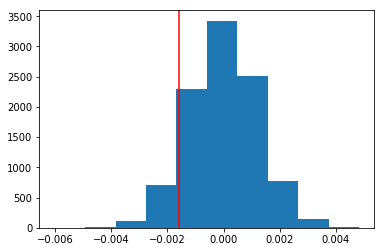

In [41]:
# plot a histogram of the values in the array we generated
# check it against the difference between new_page and old_page
# conversion rates from the actual data set

plt.hist(p_diffs)
plt.axvline(x=observed_conv_rate_diff , color='red')

When we assumed the case of the null hypothesis that is closest to the alternative hypothesis (Pnew - Pold = 0), we got a distribution that is quite a bit to the right of the actual difference between the the performance of the new page versus the old page (shown here by the red line).
This tells us that the null hypothesis (Pnew - Pold = 0)  is consistent with the new page doing quite a bit better aganist the old page than it was observed to do. (ie: When we assume Pnew - Pold = 0 the vast majority of simulated trials resulted in Pnew doing better than it had actually been observed to do.)
But our null hypothesis was that the new page will either
do as well (Pnew - Pold = 0 -- what our diagram above depicts) or WORSE than the old page (Pnew - Pold < 0).
So we definitely do not want to reject the null hypothesis. Far from doing enough better than parity (Pnew - Pold = 0) to justify switching from the old to the new pages, the new pages did considerably worse than parity (Pnew - Pold < 0).

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [42]:
# what portion of the values in p_diff (new page conversion rate minus old page
# conversion rate under the null assumption of zero difference in conversion rates)
# are greater than the actual observed difference in our data set.
# this is the p-value: the likelihood of getting a value at least extreme as the
# one we observed, if the null hypothesis is true
(p_diffs > observed_conv_rate_diff).mean()

0.90410000000000001

The alternative hypothesis has been clobbered. Assuming the null to be true, 
we generated a random distribution of the difference in the mean conversion 
rates of the new versus old pages, and only ten percent of the outcomes we generated were as low or lower than the actual observed difference between the new versus old conversion rates. Since the null assumed that the old pages would either do as well or better than the new pages (meaning the old page conversion rate subtracted from the new page conversion rate would be equal to or less than zero), the null hypothesis was right in 90% our 10,000 experiments. That is to say, our p-value (the probability that if the null hypothesis is true, we will obxerve results at least as extreme as the observed results) is .9. Recall that our alpha was .05 and we don't reject the null unless our p-value is less than our alpha. There is absolutely no reason to reject the null. So we fail to reject the null and we keep the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [20]:
# calculate how many successful conversions each group actually had
convert_old = df2[df2.group == 'control'].converted.sum()
convert_new = df2[df2.group == 'treatment'].converted.sum()
# there is no need to change n_old or n_new because n_old is already the 
# number of treatment rows in df2; and n_old is already the number of group
# rows in df2
n_old = n_old
n_new = n_new
print(convert_old)
print(convert_new)

17489
17264


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [21]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
# counts is the # of successes in the trials in df2
counts = np.array([convert_new, convert_old])
# nobs is the number of trials that were carried out in df2
nobs = np.array([n_new, n_old])
# we can see from the graph above that our experiment is 
# a one-tailed one. Also, our alternative assumes that Pnew > Pold
# therefore we have to use the 'alternative="larger"' parameter
# note that we also therefore have to put convert_new ahead of convert_old
# in the np.array created for counts above
stat, pval = proportions_ztest(counts, nobs, alternative="larger")
print(stat)
print(pval)

-1.31092419842
0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The p-value from the z-test is a tiny bit greater than the one we found through the simulations (parts h, i, j, k above). But they are close (about .904 for simulations versus about .905 for the ztest) and both clearly argue for failing to reject the null.

A z-score of -1.3 means the sample average is 1.3 below the hypothesized mean of zero (ie: of Pnew = Pold). So again the bulk of the simulated trials resulted in values that are less than zero, which is to say values in which Pold is actually larger than Pnew. Again, we fail to reject the null.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?



The choice between conversion or no-conversion is a categorical one (either category 0 for no conversion or category 1 for conversion). For modeling categorical choices, we have to use logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [22]:
# we are creating a logistic regression model for this A/B Test
# first we need to create the dummy variables for treatment group = 0
# and control group = 1
# the first column will map 'control' to 1 and 'treatment' to 0
# so we'll drop that column, and keep only the second, which
# will map 'treatment' to 1 and 'control' to 0
df2[['ab_drop', 'ab_page']] = pd.get_dummies(df2['group'])
df2.drop('ab_drop', 1)
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_drop,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


{Why doesn't the ab_drop column get dropped?
I asked the dataframe to drop it.}

In [23]:
# add the intercept and create the logistic regression model
df2['intercept']=1
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results=log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-06-30 23:37 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [9]:
print(np.exp(-1.9888))
print(np.exp(-.015))
print(1/np.exp(-.015))

0.136859558416
0.985111939603
1.01511306462


ab_page's 1 value is 'treatment'; and it's 0 value 'control'.
So for every 1 increase in the number of conversions, there was a .985 increase in the number of treatment trials. That is to say: as conversions went up, 'control' increased more than 'treatment'. This again argues for the null hypothesis, since it assumes that 'treatment' will do as well or (as in this model) worse than 'control'.

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

The Softmax Function:

y_convert_probability = softmax(Intercept + co-eff * x_feature_value)

In [25]:
def softmax(scores):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(scores - np.max(scores))
    return e_x / e_x.sum()

Intercept = -1.9888
ab_page_coeff = 0.0150
x_feature_value_treatment = np.asarray(df2['ab_page'])

convert_probability_treatment = softmax(Intercept + ab_page_coeff * x_feature_value_treatment )
convert_probability_treatment

array([  3.41553292e-06,   3.41553292e-06,   3.46715209e-06, ...,
         3.41553292e-06,   3.41553292e-06,   3.46715209e-06])

In [26]:
convert_probability_treatment.mean()

3.4413457038240232e-06

In [30]:
# what if we run the same experiment with the drop column?
# recall that that's the column where treatment is 0 and control is 1
# so that column should give us the probability of conversion for the control group
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_drop']])
results=log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-06-30 23:46 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -2.0038    0.0081  -247.1457  0.0000  -2.0197  -1.9879
ab_drop       0.0150    0.0114     1.3109  0.1899  -0.0074   0.0374
==================================================================

"""

In [31]:
def softmax(scores):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(scores - np.max(scores))
    return e_x / e_x.sum()

Intercept = -2.0038
ab_page_coeff = 0.0150
x_feature_value_control = np.asarray(df2['ab_drop'])

convert_probability_control = softmax(Intercept + ab_page_coeff * x_feature_value_control )
convert_probability_control

array([  3.46715853e-06,   3.46715853e-06,   3.41553927e-06, ...,
         3.46715853e-06,   3.46715853e-06,   3.41553927e-06])

In [32]:
convert_probability_control.mean()

3.441345703824024e-06

In [33]:
# the difference between the probability of conversion in the treatment vs the control groups
convert_probability_treatment.mean() - convert_probability_control.mean()


-8.4703294725430034e-22

That number is too small to be considered statistically significant.

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

Using regression analysis and the softsmax function, we found no statistically significant difference between the conversion rates of the treatment and the null groups. We still fail to reject the null, but it is strange that the Pold is no longer outperforming Pnew (as had happened in all our other models).

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

In the p-value associated with ab_page, the p-value is .1899. That is much less than the .9 p-value we'd gotten by running simulations, but it is still far above .05 and allows us to reject the null hypothesis. But what is the null hypothesis in this case? It would be that the ab_page coefficient is equal to or greater than 1. This is because the ab_page coefficient shows how many increases there are in the 'treatment' class for every 1 unit increase of the 'conversion' class. So for the 'treatment' class to do as well or worse than the 'control' class (this is always the experiments null hypothesis), the 'treatment' class needs to incremented by 1 unit or less for every 1 unit increase in the 'conversion' class. Since the ab_page score (.985) is less than 1 and the p-value greater than .05, we can safely fail to reject the null. I am not sure why the p-value was so different in the regression analysis. Both analyses assumed a one-tailed distribution. The null and alternative hypothesis are a little different. Both assume Pnew - Pold = 0 for the null, but the regression model didn't measure directly for that. 

The regression measured for the coefficient you multiply by the 'treatment' class for every 1 unit increase in the 'conversion' class. This finds essentially the same information as the simulations, but the exponents flatten the results somewhat. Perhaps that squished down the p-value as well? I really don't know.

The null and alternative hypotheses in the simulations are Pnew - Pold <= 0 and Pnew - Pold >= 0, respectively.

The null hypothesis in the regression model is that the exponent of the intercept in the regression model run for ab_page is less than or equal to 1. That's because the ab_page has 'treatment' as 1, so if the exponent of the intercept is less than or equal to 1, every time you increment 1 conversion class, you increment no more than 1 'treatment' class and at least 1 'control' class. 

It seems to me that in both cases, you could write the null and alternative hypotheses as Pnew - Pold <= 0 and Pnew - Pold >= 0, respectively. Since though the regression model is going about things in a round about, convoluted and tedious manner, it is still finding out whether or not Pnew does as well, better than, or worse than Pold.



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

We could look at a user's age, gender, location, how long they stayed on the site, how many times they've visited in the past month. We may not be able to get data for all of those variables, but we should at least be able to track location, how long they stayed on the site, and how many times they used it. Adding extra factors will create confusion if the factors are interrelated. But age, gender, and location should be fairly independent variables. The advantage of adding, say age and gender, might be that we'd discover we were appealing only to a very narrow segment of the population, which -- depending on the content of our site -- we might try to widen. A disadvantage to trying to add more factors is that we could lose sight of the fact that the goal is to maximize the number of users and the number of converts. Also, trying to figure out too precisely who are users and converts are could lead to more errors (since the data would become more complex and less reliable).

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [9]:
df3 = pd.read_csv('countries.csv')
df3.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [10]:
df3.groupby('country').nunique()

,user_id,country
country,,
CA,14499,1
UK,72466,1
US,203619,1


In [16]:
df3[df3['country']=='CA'].head()

,user_id,country
66,813256,CA
71,942405,CA
73,867026,CA
105,744693,CA
118,665919,CA


In [11]:
df3[['UK', 'US', 'CA']] = pd.get_dummies(df3['country'])
df3.head()

,user_id,country,UK,US,CA
0,834778,UK,0,1,0
1,928468,US,0,0,1
2,822059,UK,0,1,0
3,711597,UK,0,1,0
4,710616,UK,0,1,0


In [15]:
df4 = df2.join(df3.set_index('user_id'), on='user_id')
df4.head()

,user_id,timestamp,group,landing_page,converted,ab_drop,ab_page,intercept,country,UK,US,CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,US,0,0,1


In [21]:
import statsmodels.api as sm
df4['intercept']=1
log_mod = sm.Logit(df4['converted'], df4[['intercept', 'ab_page', 'US', 'CA']])
results=log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-06-25 17:31 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
US             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
CA             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

In [22]:
print(np.exp(-.0149))
print(np.exp(.0506))
print(np.exp(.0408))

0.985210455723
1.0519020483
1.04164375596


For this logistic regression model, we got a coefficient of .98521 for the ab_page with a p-value of .192. Since ab_page has 'treatment' set to 1 and 'control' set to 0, this result suggests that the 'control' group is 1 - .985 = .015 more likely to convert than the treatment page. This is in keeping with previous results, which also had the control page doing a tiny bit better than the treatment group.
The model also found the following: UK users were the least likely to convert, US users were 1.052 times more likely to convert than UK users (p-value here was .075) and Canadian users were 1.041 times more likely to convert than UK users (p-value .192).

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [18]:
# add new pages of interactions between the pages
# and the two countries that aren't the index
df5 = df4
df5['ab_UK'] = df4['ab_page'] * df4['UK']
df5['ab_CA'] = df5['ab_page'] * df5['CA']

In [20]:
# make a regression model of these interactions
sm.Logit(df5['converted'], df5[['intercept','ab_page','ab_UK', 'ab_CA']])
results2=log_mod.fit()
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-06-26 13:47 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

I am told (and accept without understanding) that this model examines the way the pages interact with the countries (this, I am given to understand, is somehow different from the previous regression model which showed how different pages did in different countries). The ab_page coefficient and p-value results here are both the same as above, which suggests to my informants that the interaction between the pages and the countries is of no statistically discernable consequence. This much makes sense to me, although I cannot pretend to understand how a page interacts with a country--if that is indeed different from how well a page does in a given country, which I guess is what I'm being told is true.

## Conclusion

Because we got p-values of much greater than the allowed .05 regardless of whether we tested the hypothesis with simulated trials or with regression models, we fail to reject the null hypothesis and recommend keeping the old version of the web page up, rather than replacing with the new version of the web page.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])